In [24]:
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
np.random.seed(1234)

In [25]:
initial={} # start of the phrase
first_order={}    # second word only
second_order={}


In [3]:
def remove_punctuation(s):
  return s.translate(str.maketrans("","",string.punctuation))

In [26]:
# data="/content/drive/MyDrive/NLP/robert_frost.txt"
data="/content/mix_poetry.txt"

In [27]:
def add2dict(dic,key,value):
  if key not in dic:
    dic[key]=[]
  dic[key].append(value)


In [28]:
# at this stage after running this cell the dictionaries only contains the
# actual counts for each order,we will normalize it for converting to the probabilities

for line in open(data):
  #  tokens=remove_punctuation(line.rstrip().lower()).split()
   tokens=line.split()
   T=len(tokens)
   for i in range(T):
    t=tokens[i]
    if i==0:
      initial[t]=initial.get(t,0.)+1   # increased the count of the initial word
    else:
      t_1=tokens[i-1]                                    # of the sequence
      if i==T-1:
        add2dict(second_order,(t_1,t),"END")
      if i==1:
        add2dict(first_order,t_1,t)   # measure the distribution of the second word gievn only the first word
      else :
        t_2=tokens[i-2]
        add2dict(second_order,(t_2,t_1),t)


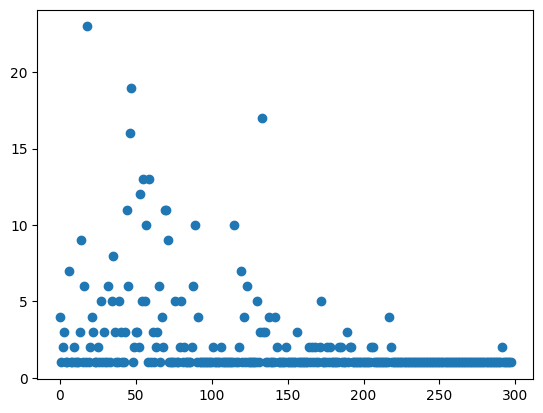

In [29]:
# plot for the initial matrix
plt.plot(initial.values(),'o')

"Normalizing the distribution"

In [31]:
# Normalizing the initial dict
total_initial=sum(initial.values())
for t,v in initial.items():
  initial[t]=v/total_initial

In [ ]:
first_order.items()

In [32]:

def list2dict(lst):
  dct={}
  n=len(lst)
  for i in lst:
    dct[i]=dct.get(i,0.)+1
  for key,val in dct.items():
    dct[key]=val/n
  return dct


In [33]:
# Normalizing the first order dictionary
for t_1 ,t in first_order.items():
  first_order[t_1]=list2dict(t)
# first_order["the"]

In [34]:
# Normalizing the second order dictionary
for (t_2,t_1),t in second_order.items():
  second_order[(t_2,t_1)]=list2dict(t)

In [35]:
# funciton to smaple a word from the dictioanary
def sample_word(d):
  p0=np.random.random() # generates the number between (0,1) -- representing the probability
  # print(p0)
  cumulative=0
  for t,p in d.items():
    cumulative+=p
    if p0<cumulative:
      return t
  assert(False)

Generating the poetry

In [36]:
def Generate():

  for i in range(5):
    sentence=[]
    #initial word
    w0=sample_word(initial)
    sentence.append(w0)

    # sampling the second word

    w1=sample_word(first_order[w0])

    sentence.append(w1)

    while True:
      w2=sample_word(second_order[(w0,w1)])
      if w2 =="END":
        break
      sentence.append(w2)
      w0=w1
      w1=w2
    print( " ".join(sentence))


Examples

In [100]:
Generate()


which means the seven caves that we havent tried
i wonder
or like the poetesss life
ive never listened in among the raspberry vines
perhaps you have three cards
to see me end a lie
and both of them to splinters what did that prove
long since gave up pretense of keeping covered
she wants our hens to be undone


In [37]:
Generate()

कल जहाँ दीवार थी है आज इक दर देखिए
कोई उस को ढूँड कर मैं और तू
रेत उड़ाए गर्म हवा तो कैसे मैं बरसात लिखूँ
उठाए फिरते थे एहसान जिस्म का जाँ पर
मगर मैं पहचानता था जिस को वो आदमी अब कहीं नहीं है


In [38]:
Generate()

बंध गई थी दिल में उतर गया सूरज
ये नज़र जब उठे जहाँ ठहरे
जानता हूँ मैं तुम को कब फ़ुर्सत है दुख देने की
धूप उन्डेलो थोड़ी सी जान बाक़ी है
संग-ए-मरमर, ऊदा बादल, सुर्ख़ शफ़क़, हैराँ आहू


In [39]:
Generate()

क्या अजब उन के दामनों में भरे हैं रफ़ू के फूल
फिर से वो अहल-ए-सियासत में हुए हैं बे-असर मैं और मिरी आवारगी
हमें ये शौक़ है क्या आस्तीं भिगोने का
जब भी फ़ुर्सत होती है
इस नगरी में क्यूँ मिलती है बाज़ार में


In [40]:
Generate()

एक इक कर के उन्हें बेचा किया
कभी तो हँस के मिला और कभी मिला भी नहीं पाई
पहले तू लगती थी कितनी बेगाना
कोई दीवार धो गया जैसे
ख़ुद-कुशी क्या दुखों का हल बनती
